In [2]:
import pandas as pd
import numpy as np

In [3]:


movies = pd.read_csv("movies_metadata.csv", low_memory=False)


In [4]:
# 1. Dataset ke first 5 rows dekhne ke liye
movies.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
# 2. Dataset me kitni rows aur columns hain
movies.shape


(45466, 24)

In [6]:
# 3. Columns ke naam aur unka data type dekhne ke liye
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# Missing values count in each column
movies.isnull().sum()


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [8]:
# Drop useless columns with too many missing values
movies = movies.drop(['homepage', 'belongs_to_collection', 'tagline'], axis=1)

# Verify shape after dropping
movies.shape


(45466, 21)

In [9]:
movies.isnull().sum()


adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
original_title            0
overview                954
popularity                5
poster_path             386
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
video                     6
vote_average              6
vote_count                6
dtype: int64

In [10]:
# Convert numeric columns from object → float
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

# Convert release_date to datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Check data types again
movies.dtypes


adult                           object
budget                         float64
genres                          object
id                              object
imdb_id                         object
original_language               object
original_title                  object
overview                        object
popularity                     float64
poster_path                     object
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
spoken_languages                object
status                          object
title                           object
video                           object
vote_average                   float64
vote_count                     float64
dtype: object

In [11]:
# Step 1: Find Top 10 Highest Revenue Movies
top10_revenue = movies.sort_values(by='revenue', ascending=False).head(10)

# Step 2: Check output
top10_revenue[['title', 'revenue']]


,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
28830,Furious 7,1.506249e+09
26558,Avengers: Age of Ultron,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
22110,Frozen,1.274219e+09
42222,Beauty and the Beast,1.262886e+09


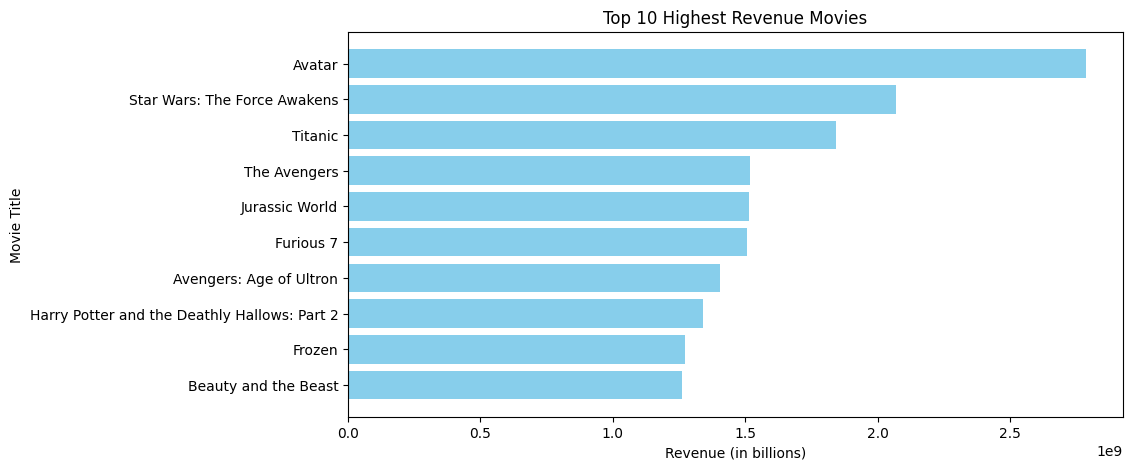

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.barh(top10_revenue['title'], top10_revenue['revenue'], color='skyblue')
plt.xlabel('Revenue (in billions)')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Revenue Movies')
plt.gca().invert_yaxis()  # Top movie appears on top
plt.show()


In [13]:
# Step 7: Top 10 Highest Rated Movies (based on vote_average)
top10_rated = movies.sort_values(by='vote_average', ascending=False).head(10)

# Display only title and rating
top10_rated[['title', 'vote_average']]


,title,vote_average
21642,Ice Age Columbus: Who Were the First Americans?,10.0
15710,If God Is Willing and da Creek Don't Rise,10.0
22396,Meat the Truth,10.0
22395,Marvin Hamlisch: What He Did For Love,10.0
35343,Elaine Stritch: At Liberty,10.0
186,Reckless,10.0
45047,The Human Surge,10.0
22377,The Guide,10.0
22346,هیچ کجا هیچ کس,10.0
1634,Other Voices Other Rooms,10.0


In [14]:
import ast

# Step 1: Convert 'genres' column from string → list
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Step 2: Create a new DataFrame with each genre separated
genre_data = []

for _, row in movies.iterrows():
    for genre in row['genres']:
        genre_data.append({'genre': genre['name'], 'vote_average': row['vote_average']})

genre_df = pd.DataFrame(genre_data)

# Step 3: Calculate average rating by genre
genre_avg_rating = genre_df.groupby('genre')['vote_average'].mean().sort_values(ascending=False)

# Step 4: Display result
genre_avg_rating.head(10)


genre
Animation      6.275181
History        6.154220
War            6.041119
Drama          5.905221
Music          5.879599
Crime          5.878407
Documentary    5.823093
Mystery        5.820470
Romance        5.802658
Fantasy        5.787722
Name: vote_average, dtype: float64

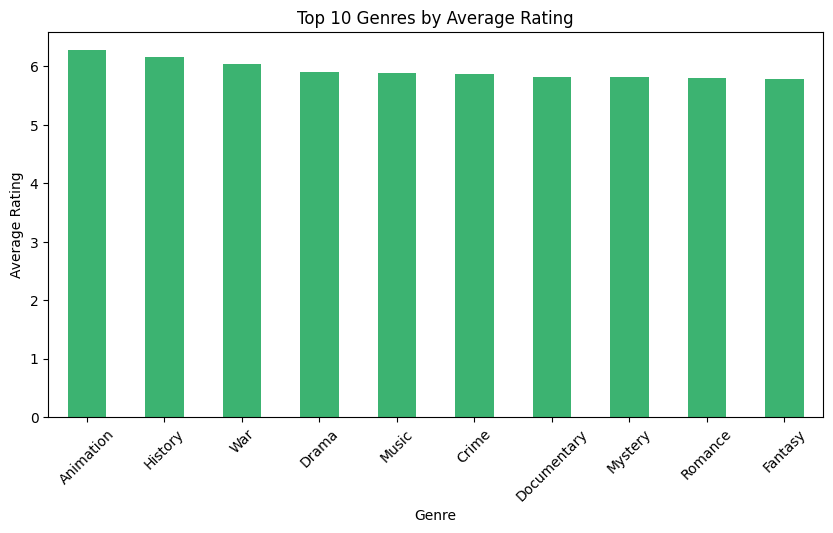

In [15]:
plt.figure(figsize=(10,5))
genre_avg_rating.head(10).plot(kind='bar', color='mediumseagreen')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')
plt.xticks(rotation=45)
plt.show()


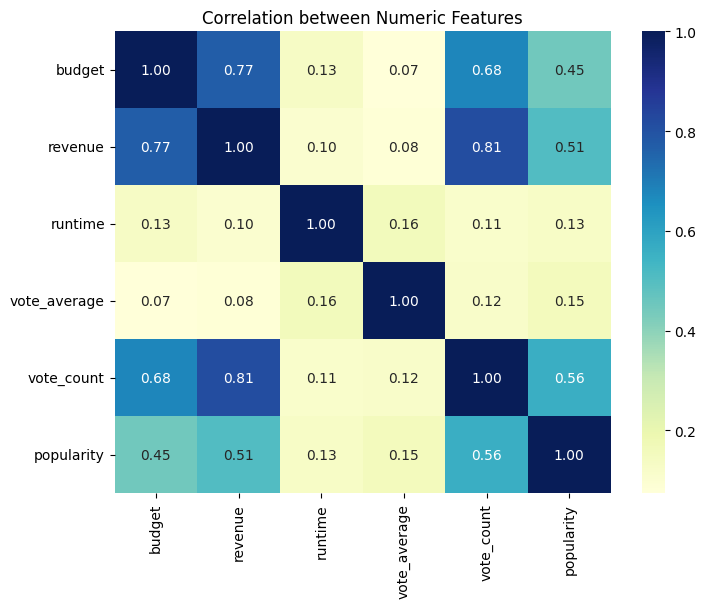

In [17]:
import seaborn as sns


# Step 1: Select only numeric columns for correlation
numeric_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity']

# Step 2: Correlation matrix
corr_matrix = movies[numeric_cols].corr()

# Step 3: Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation between Numeric Features')
plt.show()
